# HW1: Neural Networks
Welcome to HomeWork 1  &#128522;&#9996;<br>
It's time to build your first neural network, which will have a hidden layer. 

**In this homework, you will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation
- Update weights using gradient descent
- ...

We will start by loading the packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Then, we load the dataset:

In [3]:
def load_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

You have: <br>- a numpy-array (matrix) X that contains your features (x1, x2) <br> - a numpy-array (vector) Y that contains your labels (red:0, blue:1)

In [4]:
X, Y = load_dataset()

We can visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a neural network model to classify data into two classes {0, 1}.<br>

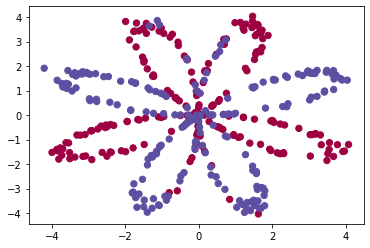

In [5]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

From now implement your model.
<br>
Please add cells and explain yours developing steps and your results.

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای توضیحات از زبان فارسی استفاده نمایید.
<br>
موفق باشید

</div>

در کد زیر ابعاد ورودی و خروجی مشخص شده است 

In [6]:
shape_X = X.shape
shape_Y = Y.shape
print ('shape of X: ' + str(shape_X))
print ('shape of Y: ' + str(shape_Y))

shape of X: (2, 400)
shape of Y: (1, 400)


در تابعی که زیر تعریف شده تعداد نرون های لایه ی ورودی که 2 هست تعدا نرون های لایه ی مخفی که 4 در نظر گرفتیم و تعداد نرون های لایه ی  خروجی که 1 هست برگردانده می شود 

In [7]:
def layer_sizes(X, Y):

    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0] 
    return (n_x, n_h, n_y)

در تابع زیر پرامتر های شبکه مقدار دهی اولیه می شوند و چون در شبکه دو لایه داریم دو ماتریس وزن  و دو وکتور بایاس تعریف شده است
استفاده از تابع seed
برای تولید اعداد تصادفی یکسان
مقادیر در یک دیکشنری ذخیره می شود و برگردانده می شود 

In [8]:
def initialize_parameters(n_x, n_h, n_y):
 
    np.random.seed(2)

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    #W1 = np.zeros((n_h, n_x)) 
    #b1 = np.zeros((n_h, 1))
    #W2 = np.zeros((n_y, n_h)) 
    #b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

در قسمت زیر پرامتر های شبکه مقدار دهی اولیه شده و چاپ شده اند 

In [9]:
n_x=2
n_h=4
n_y=1
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


در قسمت زیر تابع فعال ساز سیگموید اعریف شده است که در ادامه استفاده می شود 

In [10]:
def sigmoid(x):
    y1 = 1. / (1. + np.exp(-x))
    return y1

قسمت فوروارد پروپگیشن در تابع زیر پیاده سازی شده از که با صدا زدن ان مقدار خروجی لایه ها و خروجی نهایی حساب می شود 

In [11]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 =sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

در قسمت زیر تابع فوروارد پروپ صدا با مقادیر اولیه ای که در بالا حساب کردیم صدا زده می شود و خروجی را ذخیره می کنیم 

In [12]:
A2, cache = forward_propagation(X, parameters)

تابع هزینه در زیر پیاده سازی شده است که خروجی واقعی و خروجی مدل را می گیرد و محاسبات را انجام می دهد 

In [13]:
def compute_cost(A2, Y):
 
    
    m = Y.shape[1] 
    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
    cost = (-1/m)*(np.sum(logprobs))  
    
    cost = np.squeeze(cost)     
    assert(isinstance(cost, float))
    
    return cost

در زیر تابع هزینه با مقادیری که در بالا بدست اوردیم صدا زده می شود و هزینه پس از انجام یک عمل فوروارد چاپ شده است 

In [14]:
print("cost = " + str(compute_cost(A2, Y)))

cost = 0.6930480201239823


تابع بک پروپگیشن در زیر نوشته شده است که مقادیر مشتق ها را حساب کرده و برمی گرداند 

In [15]:
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = (1/m)* np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

تابع بک پروپ با مقادیری که در بالا حساب شده صدا زده می شود و خروجی یعنی گرادیان های پارامتر های مورد نظر چاپ شده است 

In [16]:
grads = backward_propagation(parameters, cache, X, Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00023606 -0.00207914]
 [ 0.0002091  -0.00178201]
 [-0.00012051  0.0010843 ]
 [-0.00051496  0.00449162]]
db1 = [[ 1.06848030e-07]
 [-9.70907252e-07]
 [-7.20012658e-08]
 [ 3.03048452e-07]]
dW2 = [[-1.75478714e-05  3.70240274e-03 -1.25686736e-03 -2.55725650e-03]]
db2 = [[-1.0892314e-05]]


در تابع زیر بروزرسانی پارامتر های شبکه بر اساس گرادیان های حساب شده و نرخ یادگیری بدست می اید 

In [17]:
def update_parameters(parameters, grads, lr = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
 
    W1 = W1-(lr*dW1)
    b1 = b1-(lr*db1)
    W2 = W2-(lr*dW2)
    b2 = b2-(lr*db2)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

در قسمت زیر تابع مربوط به بروزرسانی پارامتر ها با مقادیر حساب شده فراخوانی شده و خروجی چاپ شده است 

In [18]:
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00445085  0.0019323 ]
 [-0.02161288  0.01854112]
 [-0.01778975 -0.00971864]
 [ 0.00564676 -0.01784282]]
b1 = [[-1.28217636e-07]
 [ 1.16508870e-06]
 [ 8.64015190e-08]
 [-3.63658142e-07]]
W2 = [[-0.01055846 -0.01353296  0.00702278  0.02599079]]
b2 = [[1.30707768e-05]]


در تابع زیر مدل ما با تعداد لایه های مشخص شده و ورودی های مشخص شده ساخته می شود و مقادیر مورد نیاز  مثل تابع هزینه در ان استفاده شده است 

In [19]:
def L_layer_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    cost_list = []
    for i in range(0, num_iterations):
         
        A2, cache = forward_propagation(X, parameters)
        cost =compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        
        if (i + 1) % 200 == 0 and print_cost:
            print(f"The cost after {i + 1} iterations is: {cost:.4f}")

        if i % 200 == 0:
            cost_list.append(cost)

    # plot the cost curve
    plt.figure(figsize=(10, 6))
    plt.plot(cost_list)
    plt.xlabel("Iterations (per hundreds)")
    plt.ylabel("Loss")
    plt.title(f"Loss curve for the learning rate = {1.2}")

    return parameters

در قسمت زیر مدل با تعیین پیارامتر ها و تعداد تکرار به تابع ارسال می شود و نمودار خطا بر حسب تعداد تکرار رسم شده و مقادیر نهایی ابر پارامتر ها هم چاپ شده است  

The cost after 200 iterations is: 0.3460
The cost after 400 iterations is: 0.3113
The cost after 600 iterations is: 0.3001
The cost after 800 iterations is: 0.2932
The cost after 1000 iterations is: 0.2881
The cost after 1200 iterations is: 0.2840
The cost after 1400 iterations is: 0.2805
The cost after 1600 iterations is: 0.2773
The cost after 1800 iterations is: 0.2735
The cost after 2000 iterations is: 0.2544
The cost after 2200 iterations is: 0.2472
The cost after 2400 iterations is: 0.2424
The cost after 2600 iterations is: 0.2388
The cost after 2800 iterations is: 0.2361
The cost after 3000 iterations is: 0.2339
The cost after 3200 iterations is: 0.2320
The cost after 3400 iterations is: 0.2305
The cost after 3600 iterations is: 0.2291
The cost after 3800 iterations is: 0.2279
The cost after 4000 iterations is: 0.2268
The cost after 4200 iterations is: 0.2258
The cost after 4400 iterations is: 0.2249
The cost after 4600 iterations is: 0.2241
The cost after 4800 iterations is: 0.2

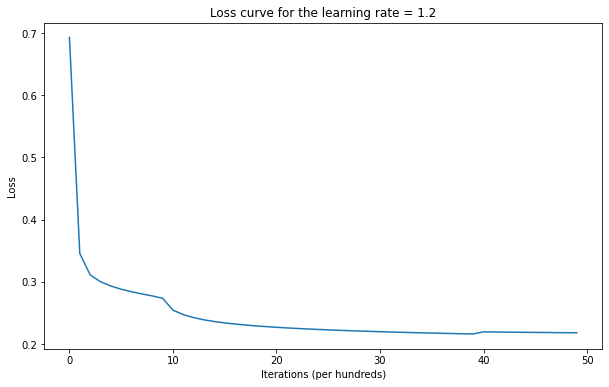

In [20]:
parameters = L_layer_model(X, Y, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

از تابع زیر برای پیش بینی خروجی برای داده های جدید پس از آموزش مدل استفاده شده و حد استانه ای برای کلاس بندی خروجی یعنی 0.5 در نظر گرفته شده است

In [21]:
def predict(parameters, X):

    A2, cache = forward_propagation(X, parameters)
    predictions = A2>0.5
  
    return predictions

در زیر داده هایی به صورت تصادفی تولید شده و به تابع پیش بینی ارسال شده تا دقت مدل را از این طریق حساب کنیم 

In [22]:
np.random.seed(1)
X_assess = np.random.randn(2, 3)
predictions = predict(parameters,X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.3333333333333333


در زیر دقت مدل برای داده های جدید حساب شده است 

In [23]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


در قسمت زیر جوابی که با مقدار دهی اولیه ی صفر به پارامتر ها بدست امده نشان داده شده همچنین مقدار نهایی که پارامتر ها در شبکه دارند و دقت و نمودار هزینه

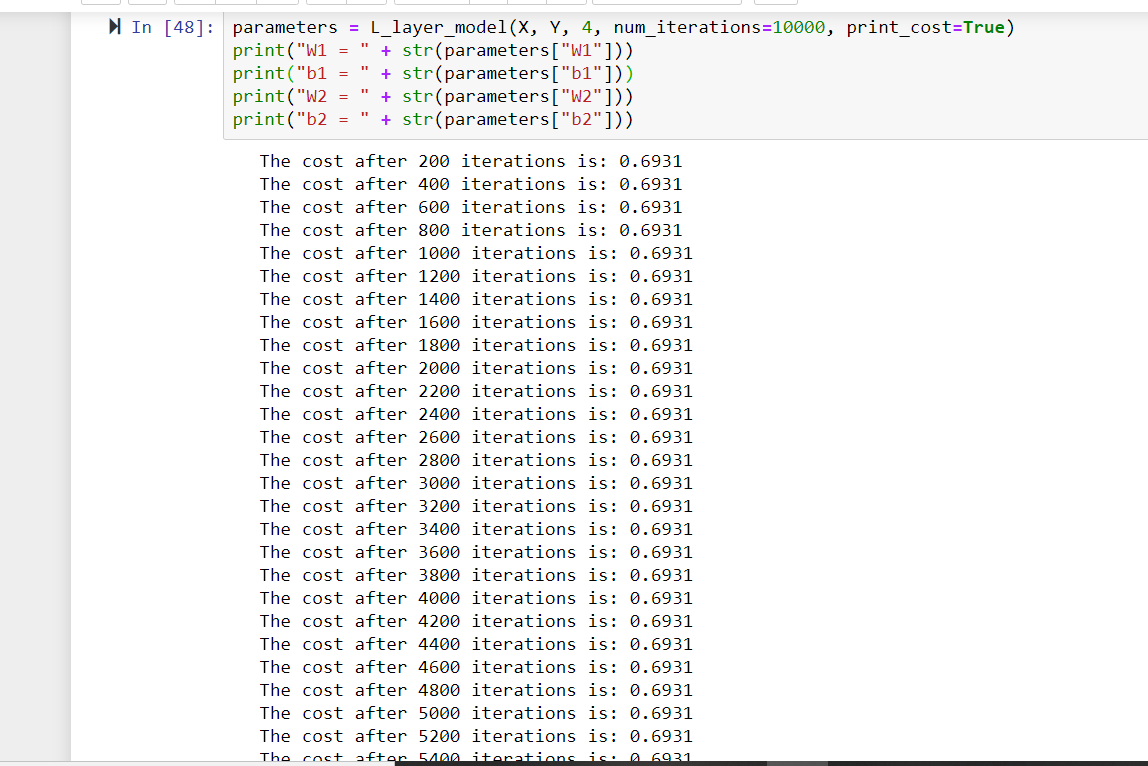

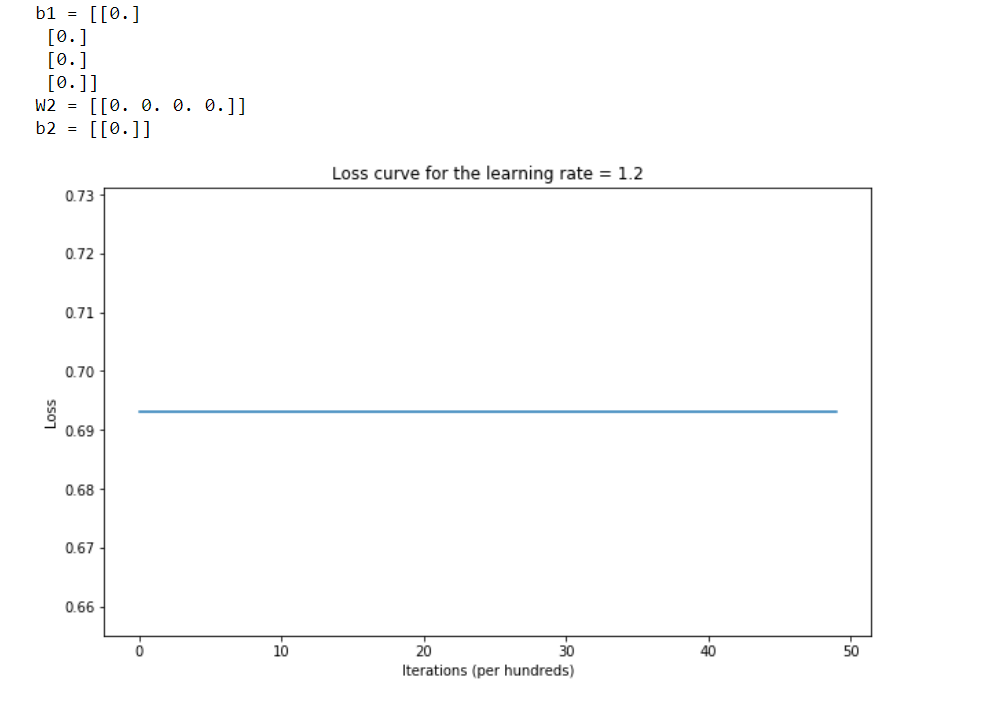

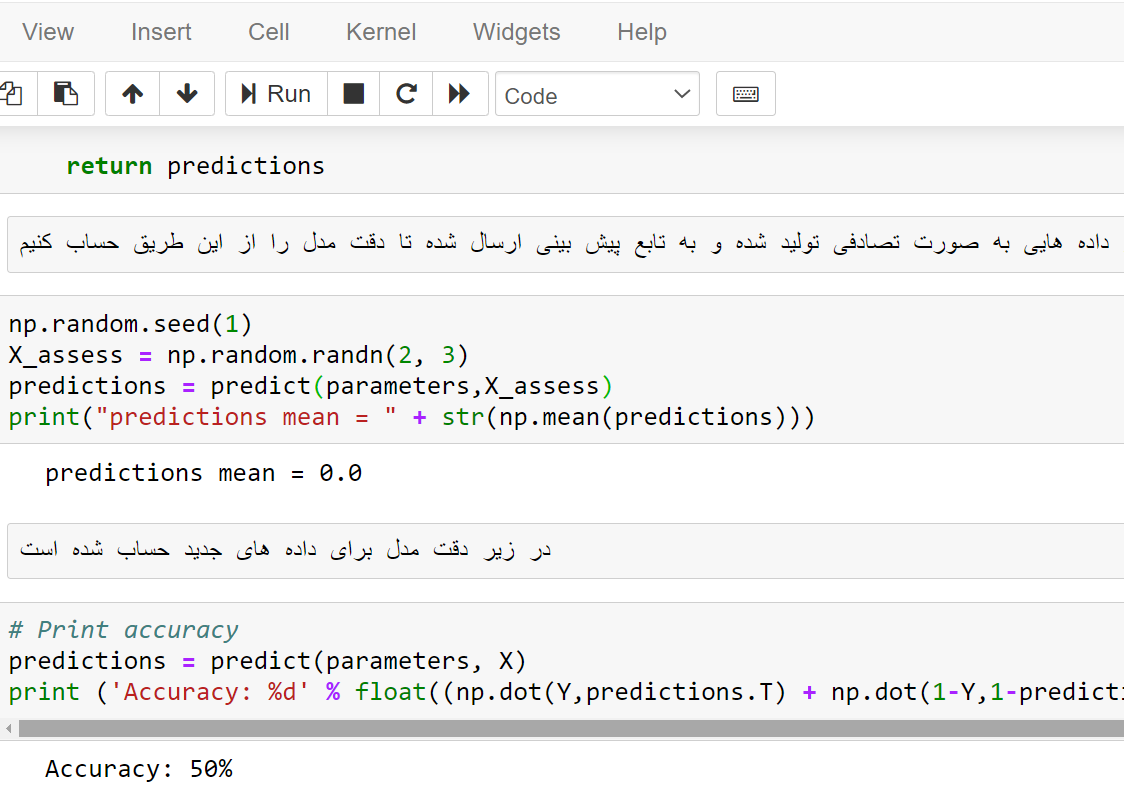